# Project Notebook

In [1]:
from scipy.io import loadmat

In [2]:
mat_data_lambda = loadmat('savelambda.mat')
mat_data_noise = loadmat('savenoise_sigma.mat')
mat_data_samples = loadmat('savesamples.mat')
lambdas = mat_data_lambda['lambda'].squeeze()
sigmas = mat_data_noise['noise_sigma'].squeeze()
samples = mat_data_samples['samples'].squeeze()

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import yscale

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [4]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, MaxPool2D
from keras.layers import BatchNormalization

In [5]:
plt.rcParams.update({'font.size': 24})

# Dataset 1

## Systematic Investigation of FFNN

In [6]:
dat = np.empty((samples.size, samples[0].size))
for i in range(samples.size):
    dat[i] = samples[i].ravel()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dat, lambdas.reshape(-1,1), test_size=0.2, random_state=42)

#ANN
model = Sequential()
model.add(Dense(256, activation='relu',input_dim=dat[0].size))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=30, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 8.9768e-04
Epoch 2/20
800/800 [==============================] - 1s 995us/step - loss: 0.0075 - val_loss: 0.0031
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 7.0815e-04 - val_loss: 0.0019
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 5.2515e-04 - val_loss: 0.0023
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 3.6070e-04 - val_loss: 0.0023
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 1.7468e-04 - val_loss: 0.0021
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 9.6330e-05 - val_loss: 0.0022
Epoch 9/

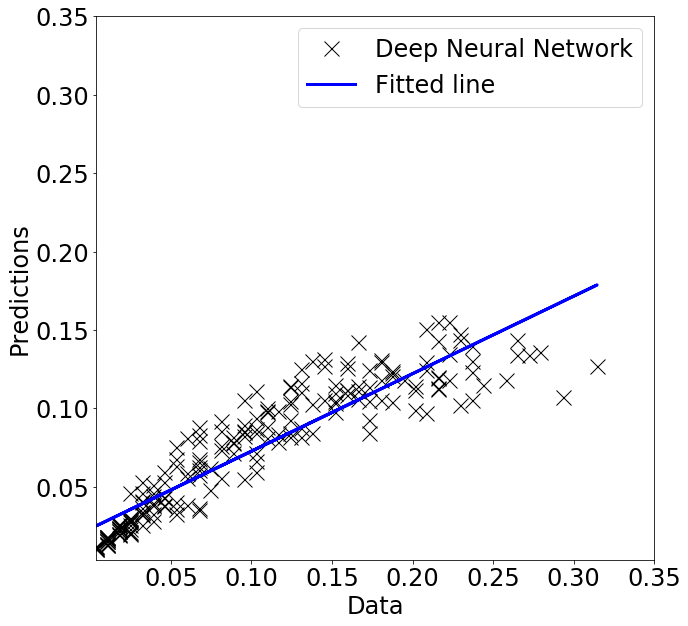

In [8]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlim(0.0035,0.35)
plt.ylim(0.0035,0.35)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [9]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.8422140055063411

In [10]:
reg.coef_[0]

array([0.49380808])

# Keeping original matrix size

Converting to (81, 91) matrices

In [6]:
dat = []
for i in range(samples.size):
    temp = samples[i].ravel()
    temp = np.flip(temp.reshape(91,81))
    dat.append(temp)
dat = np.array(dat)

## FFNN

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dat, lambdas.reshape(-1,1), test_size=0.2, random_state=42)

#ANN
model = Sequential()
#model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 0.0030 - val_loss: 6.6351e-04
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 5.5652e-04 - val_loss: 6.0382e-04
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 3.7898e-04 - val_loss: 4.8668e-04
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 2.7714e-04 - val_loss: 4.5842e-04
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 1.8990e-04 - val_loss: 4.0093e-04
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 1.7053e-04 - val_loss: 4.2775e-04
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 1.9686e-04 - val_loss: 6.9382e-04
Epoch 8/10
800/800 [==============================] - 4s 5ms/step - loss: 1.3173e-04 - val_loss: 4.1726e-04
Epoch 9/10
800/800 [==============================] - 4s 5ms/step - loss: 7.7203e-05 - val_los

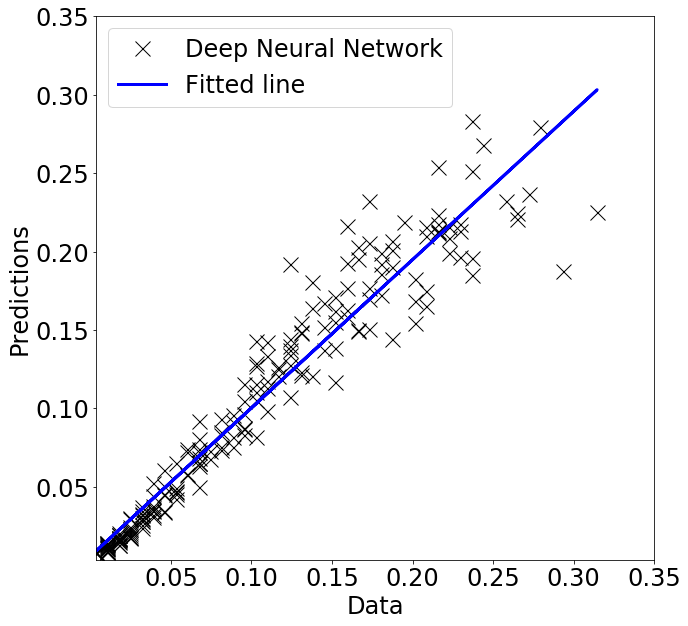

In [12]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlim(0.0035,0.35)
plt.ylim(0.0035,0.35)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [13]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.9322884561621599

In [14]:
reg.coef_[0]

array([0.94483129])

## CNN

In [49]:
X_train, X_test, y_train, y_test = train_test_split(dat, lambdas.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

model = Sequential()

model.add(Conv2D(32, (2, 2), input_shape=(91, 81, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 0.1398 - val_loss: 4.5882e-04
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 3.7584e-04 - val_loss: 3.9703e-04
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 2.9634e-04 - val_loss: 3.4858e-04
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 2.2731e-04 - val_loss: 3.7414e-04
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 1.7411e-04 - val_loss: 3.3118e-04
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 1.1124e-04 - val_loss: 3.4699e-04
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 9.1278e-05 - val_loss: 4.1077e-04
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 7.5830e-05 - val_loss: 3.2661e-04
Epoch 9/10
800/800 [==============================] - 5s 6ms/step - loss: 7.1851e-05 - val_los

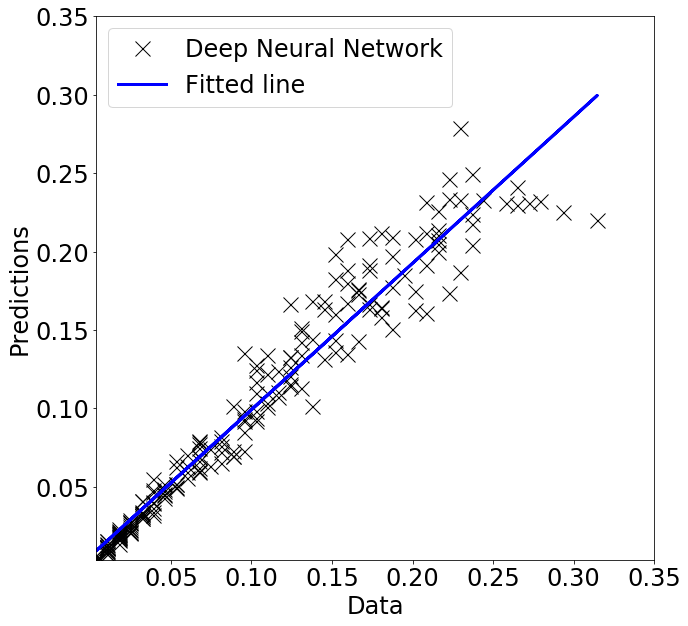

In [50]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlim(0.0035,0.35)
plt.ylim(0.0035,0.35)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [51]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.9462041702958721

In [52]:
reg.coef_[0]

array([0.93277835])

In [ ]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
#plt.ylim(0, 0.01)
#yscale('log')
plt.legend(["Loss","Validation Loss"])
plt.show()

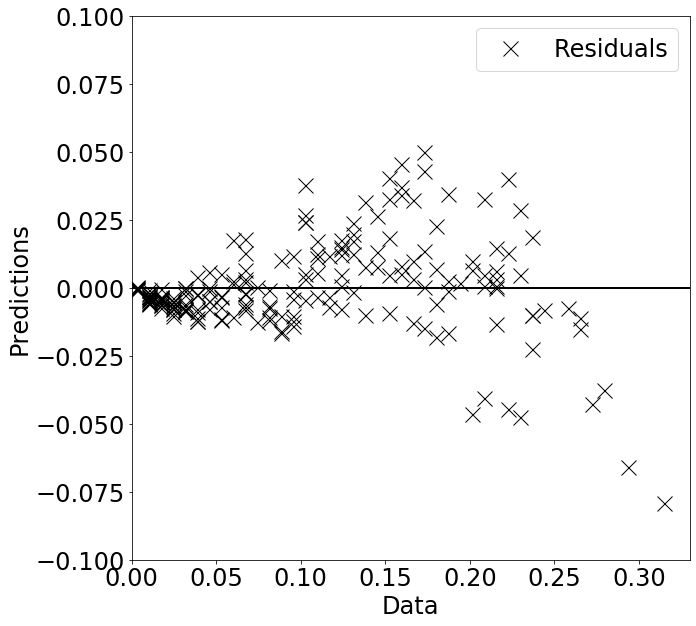

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(y_test, y_pred- y_pred_lin, 'kx', label='Residuals',markersize=15)
ax.axhline(0, color='black', lw=2)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.xlim(0,0.33)
plt.ylim(-0.1,0.1)
plt.legend()

In [25]:
sum((y_pred - y_pred_lin)**2/y_pred_lin)

array([0.41795766])

## VGG16

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dat, lambdas.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(128, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(256, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(512, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',
              loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 140s 175ms/step - loss: 17.3687 - val_loss: 0.0073
Epoch 2/10
800/800 [==============================] - 137s 171ms/step - loss: 0.0016 - val_loss: 4.9619e-04
Epoch 3/10
800/800 [==============================] - 161s 201ms/step - loss: 5.3391e-04 - val_loss: 3.5643e-04
Epoch 4/10
800/800 [==============================] - 176s 220ms/step - loss: 5.3246e-04 - val_loss: 3.2011e-04
Epoch 5/10
800/800 [==============================] - 175s 219ms/step - loss: 5.2131e-04 - val_loss: 5.6698e-04
Epoch 6/10
800/800 [==============================] - 176s 221ms/step - loss: 5.9793e-04 - val_loss: 9.0434e-04
Epoch 7/10
800/800 [==============================] - 176s 220ms/step - loss: 8.0287e-04 - val_loss: 4.2008e-04
Epoch 8/10
800/800 [==============================] - 176s 220ms/step - loss: 7.7743e-04 - val_loss: 5.3313e-04
Epoch 9/10
800/800 [==============================] - 175s 219ms/step

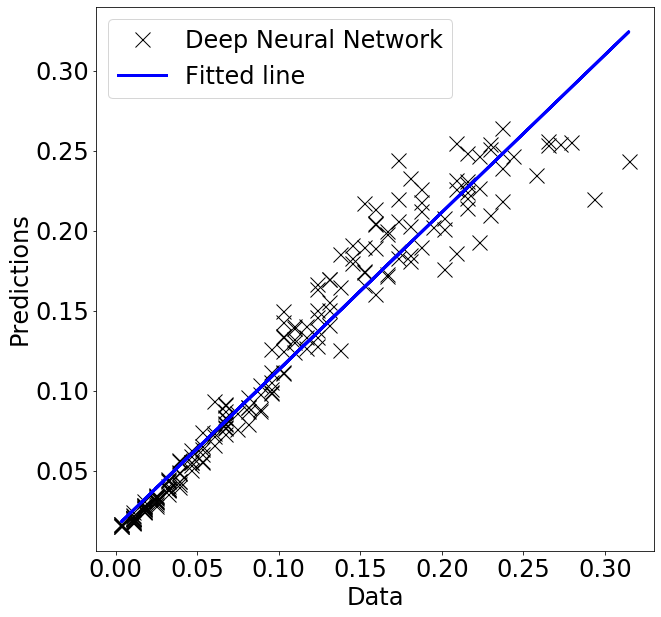

In [19]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [18]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.9502796873862528

In [20]:
reg.coef_[0]

array([0.98301396])

# Dataset 3

In [53]:
mat_data_lambda_2 = loadmat('savelambda_2.mat')
mat_data_noise_2 = loadmat('savenoise_sigma_2.mat')
mat_data_samples_2 = loadmat('savesamples_2.mat')
lambdas_2 = mat_data_lambda_2['lambda_2'].squeeze()
sigmas_2 = mat_data_noise_2['noise_sigma_2'].squeeze()
samples_2 = mat_data_samples_2['samples_2'].squeeze()

In [54]:
dat_2 = []
for i in range(samples_2.size):
    temp = samples_2[i].ravel()
    temp = np.flip(temp.reshape(91,81))
    dat_2.append(temp)
dat_2 = np.array(dat_2)

## FFNN

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dat_2, lambdas_2.reshape(-1,1), test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 0.0013 - val_loss: 2.3370e-04
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 1.7305e-04 - val_loss: 1.1934e-04
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 8.0395e-05 - val_loss: 8.9371e-05
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 5.9933e-05 - val_loss: 8.4991e-05
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 5.1267e-05 - val_loss: 6.2367e-05
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 3.3259e-05 - val_loss: 6.2415e-05
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 3.2673e-05 - val_loss: 7.0195e-05
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 2.5904e-05 - val_loss: 7.5177e-05
Epoch 9/10
800/800 [==============================] - 4s 5ms/step - loss: 1.9817e-05 - val_los

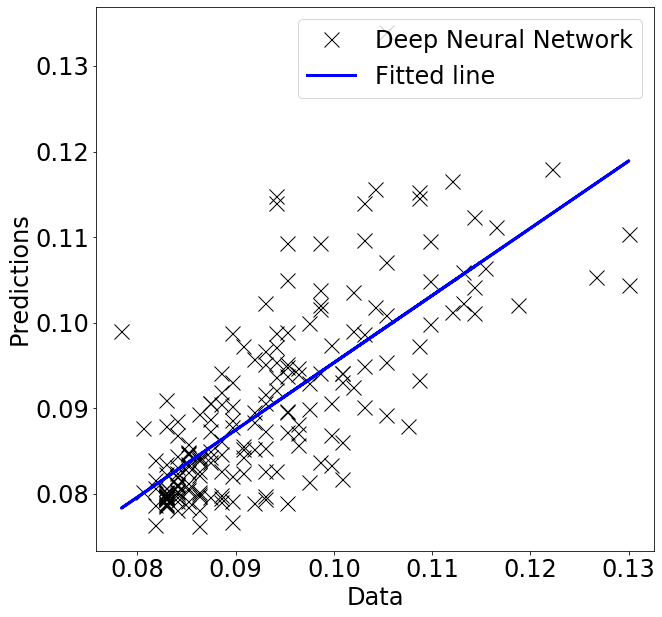

In [30]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [31]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.5701718660224013

In [32]:
reg.coef_[0]

array([0.78564812])

## CNN

In [73]:
X_train, X_test, y_train, y_test = train_test_split(dat_2, lambdas_2.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(91, 81, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 6s 8ms/step - loss: 2.9385 - val_loss: 3.7198e-04
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 2.9038e-04 - val_loss: 2.5066e-04
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 2.0165e-04 - val_loss: 1.8522e-04
Epoch 4/10
800/800 [==============================] - 5s 7ms/step - loss: 1.7700e-04 - val_loss: 1.9463e-04
Epoch 5/10
800/800 [==============================] - 5s 7ms/step - loss: 1.6446e-04 - val_loss: 1.7965e-04
Epoch 6/10
800/800 [==============================] - 6s 7ms/step - loss: 1.7309e-04 - val_loss: 2.0364e-04
Epoch 7/10
800/800 [==============================] - 5s 7ms/step - loss: 1.6959e-04 - val_loss: 1.7989e-04
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 9.8574e-05 - val_loss: 1.7755e-04
Epoch 9/10
800/800 [==============================] - 5s 7ms/step - loss: 9.5293e-05 - val_los

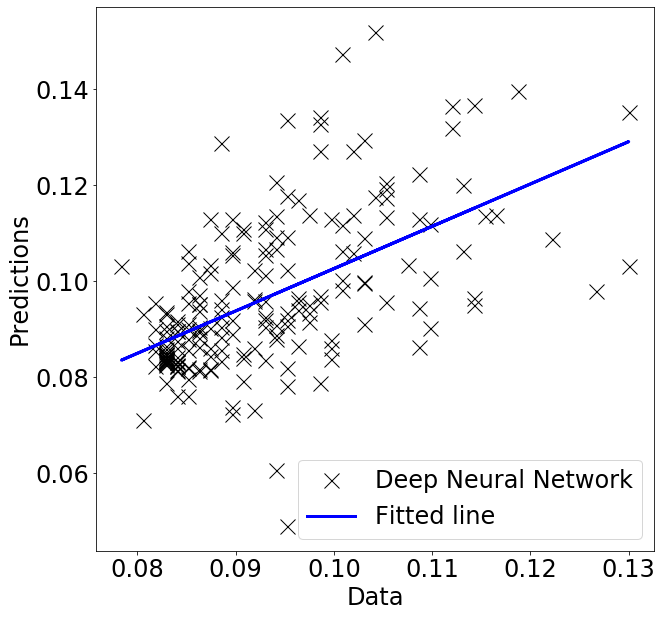

In [74]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [75]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.3214637969566099

In [76]:
reg.coef_[0]

array([0.881434])

## VGG16

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dat_2, lambdas_2.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

#ANN
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(128, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(256, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(512, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',
              loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=20)
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Epoch 1/20
800/800 [==============================] - 147s 183ms/step - loss: 1321.0714
Epoch 2/20
800/800 [==============================] - 168s 210ms/step - loss: 1.3177e-04
Epoch 3/20
800/800 [==============================] - 166s 207ms/step - loss: 1.1398e-04
Epoch 4/20
800/800 [==============================] - 165s 207ms/step - loss: 1.0343e-04
Epoch 5/20
800/800 [==============================] - 165s 206ms/step - loss: 8.8473e-05
Epoch 6/20
800/800 [==============================] - 165s 206ms/step - loss: 8.0874e-05
Epoch 7/20
800/800 [==============================] - 165s 206ms/step - loss: 8.4780e-05
Epoch 8/20
800/800 [==============================] - 165s 207ms/step - loss: 7.8156e-05
Epoch 9/20
800/800 [==============================] - 165s 206ms/step - loss: 8.8711e-05
Epoch 10/20
800/800 [==============================] - 165s 207ms/step - loss: 7.3139e-05
Epoch 11/20
800/800 [==============================] - 165s 206ms/step - loss: 7.3933e-05
Epoch 12/20
800/800 

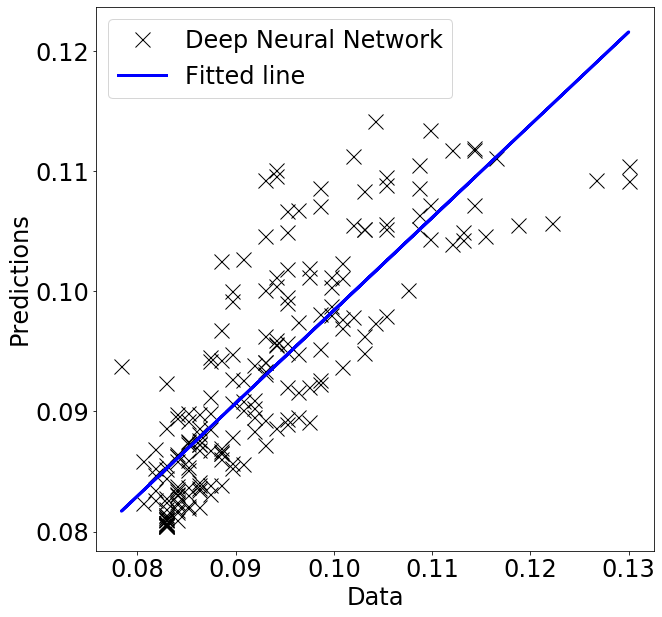

In [13]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [14]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.6985765787170277

In [15]:
reg.coef_[0]

array([0.77306009])

# Dataset 2

In [59]:
mat_data_lambda_3 = loadmat('savelambda_3.mat')
mat_data_noise_3 = loadmat('savenoise_sigma_3.mat')
mat_data_samples_3 = loadmat('savesamples_3.mat')
lambdas_3 = mat_data_lambda_3['lambda_3'].squeeze()
sigmas_3 = mat_data_noise_3['noise_sigma_3'].squeeze()
samples_3 = mat_data_samples_3['samples_3'].squeeze()

In [60]:
dat_3 = []
for i in range(samples_3.size):
    temp = samples_3[i].ravel()
    temp = np.flip(temp.reshape(91,81))
    dat_3.append(temp)
dat_3 = np.array(dat_3)

## FFNN

In [39]:
X_train, X_test, y_train, y_test = train_test_split(dat_3, lambdas_3.reshape(-1,1), test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 6s 7ms/step - loss: 1.4455e-04 - val_loss: 9.3757e-06
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 5.9497e-06 - val_loss: 3.2152e-06
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 3.0469e-06 - val_loss: 2.5833e-06
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 1.7961e-06 - val_loss: 2.0582e-06
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 1.3121e-06 - val_loss: 1.7077e-06
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 9.3582e-07 - val_loss: 1.4774e-06
Epoch 7/10
800/800 [==============================] - 4s 6ms/step - loss: 9.7628e-07 - val_loss: 1.8197e-06
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 6.7589e-07 - val_loss: 1.3582e-06
Epoch 9/10
800/800 [==============================] - 5s 6ms/step - loss: 6.6426e-07 - val

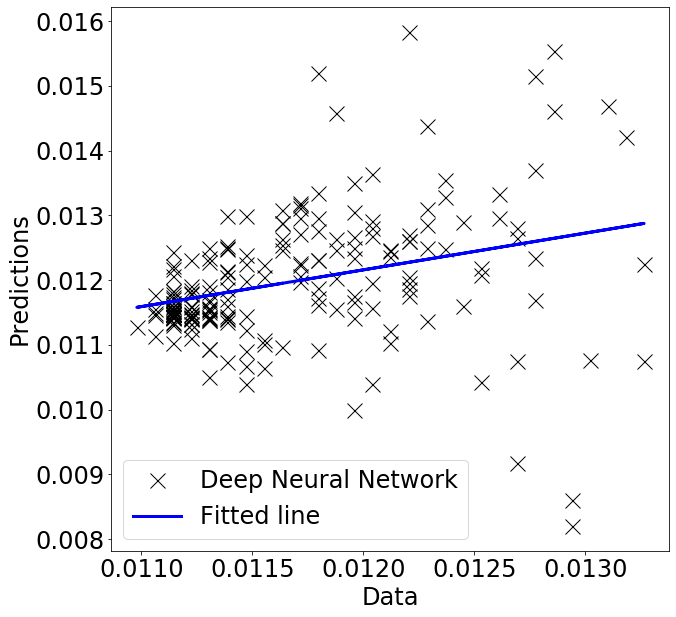

In [40]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [41]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.09284821682434852

In [42]:
reg.coef_[0]

array([0.56738307])

## CNN

In [69]:
X_train, X_test, y_train, y_test = train_test_split(dat_3, lambdas_3.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

#ANN
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(91, 81, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 6s 7ms/step - loss: 0.1366 - val_loss: 1.0617e-05
Epoch 2/10
800/800 [==============================] - 5s 7ms/step - loss: 4.3704e-06 - val_loss: 5.5394e-07
Epoch 3/10
800/800 [==============================] - 5s 7ms/step - loss: 6.9806e-07 - val_loss: 5.1330e-07
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 6.0791e-07 - val_loss: 5.1000e-07
Epoch 5/10
800/800 [==============================] - 5s 7ms/step - loss: 6.3294e-07 - val_loss: 5.0383e-07
Epoch 6/10
800/800 [==============================] - 5s 7ms/step - loss: 6.0232e-07 - val_loss: 5.4753e-07
Epoch 7/10
800/800 [==============================] - 5s 7ms/step - loss: 6.8959e-07 - val_loss: 6.0155e-07
Epoch 8/10
800/800 [==============================] - 6s 7ms/step - loss: 6.4187e-07 - val_loss: 4.7828e-07
Epoch 9/10
800/800 [==============================] - 5s 7ms/step - loss: 5.6115e-07 - val_los

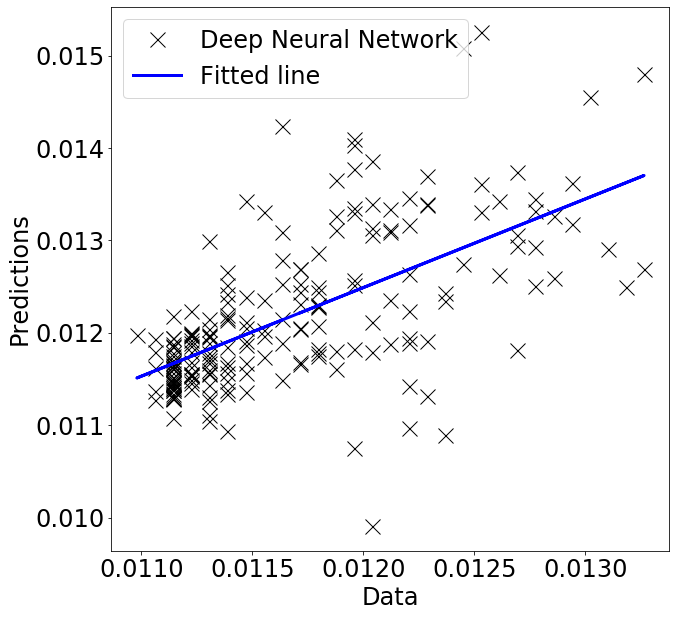

In [70]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [71]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.3891057702285442

In [72]:
reg.coef_[0]

array([0.95874874])

## VGG16

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dat_3, lambdas_3.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(128, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(256, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(512, (3, 3), input_shape=(91, 81, 1), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',
              loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=20)
y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Epoch 1/20
800/800 [==============================] - 143s 179ms/step - loss: 0.0546
Epoch 2/20
800/800 [==============================] - 177s 221ms/step - loss: 1.4054e-05
Epoch 3/20
800/800 [==============================] - 179s 223ms/step - loss: 6.4232e-06
Epoch 4/20
800/800 [==============================] - 182s 227ms/step - loss: 3.5389e-06
Epoch 5/20
800/800 [==============================] - 178s 223ms/step - loss: 2.3222e-06
Epoch 6/20
800/800 [==============================] - 175s 219ms/step - loss: 1.8969e-06
Epoch 7/20
800/800 [==============================] - 170s 212ms/step - loss: 1.4032e-06
Epoch 8/20
800/800 [==============================] - 169s 212ms/step - loss: 1.6452e-06
Epoch 9/20
800/800 [==============================] - 167s 209ms/step - loss: 1.6131e-06
Epoch 10/20
800/800 [==============================] - 169s 211ms/step - loss: 1.6783e-06
Epoch 11/20
800/800 [==============================] - 169s 211ms/step - loss: 1.3082e-06
Epoch 12/20
800/800 [==

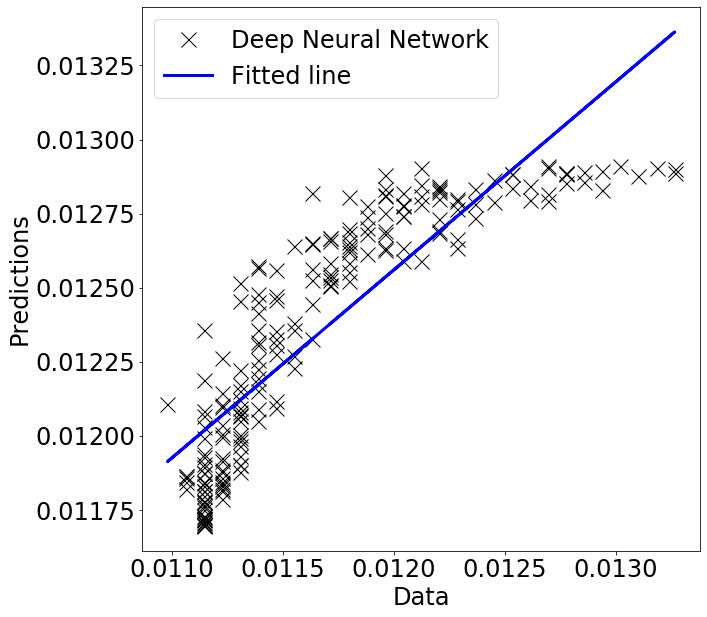

In [13]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [14]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.7451816158703909

In [15]:
reg.coef_[0]

array([0.63432354])

# Train a CNN model on all three datasets to be used on ASDEX Upgrade data:

In [16]:
mat_data_lambda = loadmat('savelambda.mat')
mat_data_noise = loadmat('savenoise_sigma.mat')
mat_data_samples = loadmat('savesamples.mat')
lambdas = mat_data_lambda['lambda'].squeeze()
sigmas = mat_data_noise['noise_sigma'].squeeze()
samples = mat_data_samples['samples'].squeeze()

In [17]:
dat = []
for i in range(samples.size):
    temp = samples[i].ravel()
    temp = np.flip(temp.reshape(91,81))
    dat.append(temp)
dat = np.array(dat)

In [18]:
mat_data_lambda_2 = loadmat('savelambda_2.mat')
mat_data_noise_2 = loadmat('savenoise_sigma_2.mat')
mat_data_samples_2 = loadmat('savesamples_2.mat')
lambdas_2 = mat_data_lambda_2['lambda_2'].squeeze()
sigmas_2 = mat_data_noise_2['noise_sigma_2'].squeeze()
samples_2 = mat_data_samples_2['samples_2'].squeeze()

In [19]:
dat_2 = []
for i in range(samples_2.size):
    temp = samples_2[i].ravel()
    temp = np.flip(temp.reshape(91,81))
    dat_2.append(temp)
dat_2 = np.array(dat_2)

In [20]:
mat_data_lambda_3 = loadmat('savelambda_3.mat')
mat_data_noise_3 = loadmat('savenoise_sigma_3.mat')
mat_data_samples_3 = loadmat('savesamples_3.mat')
lambdas_3 = mat_data_lambda_3['lambda_3'].squeeze()
sigmas_3 = mat_data_noise_3['noise_sigma_3'].squeeze()
samples_3 = mat_data_samples_3['samples_3'].squeeze()

In [21]:
dat_3 = []
for i in range(samples_3.size):
    temp = samples_3[i].ravel()
    temp = np.flip(temp.reshape(91,81))
    dat_3.append(temp)
dat_3 = np.array(dat_3)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dat, lambdas.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(91, 81, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))

model.save('my_model.h5')

y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 6s 7ms/step - loss: 0.1395 - val_loss: 7.1083e-04
Epoch 2/10
800/800 [==============================] - 6s 8ms/step - loss: 4.4379e-04 - val_loss: 4.0046e-04
Epoch 3/10
800/800 [==============================] - 6s 8ms/step - loss: 3.3901e-04 - val_loss: 4.1061e-04
Epoch 4/10
800/800 [==============================] - 6s 7ms/step - loss: 3.7069e-04 - val_loss: 3.5415e-04
Epoch 5/10
800/800 [==============================] - 5s 7ms/step - loss: 3.0158e-04 - val_loss: 3.8520e-04
Epoch 6/10
800/800 [==============================] - 5s 7ms/step - loss: 2.9325e-04 - val_loss: 3.5459e-04
Epoch 7/10
800/800 [==============================] - 5s 7ms/step - loss: 2.6455e-04 - val_loss: 3.4980e-04
Epoch 8/10
800/800 [==============================] - 5s 7ms/step - loss: 2.5270e-04 - val_loss: 3.9231e-04
Epoch 9/10
800/800 [==============================] - 5s 7ms/step - loss: 2.1660e-04 - val_los

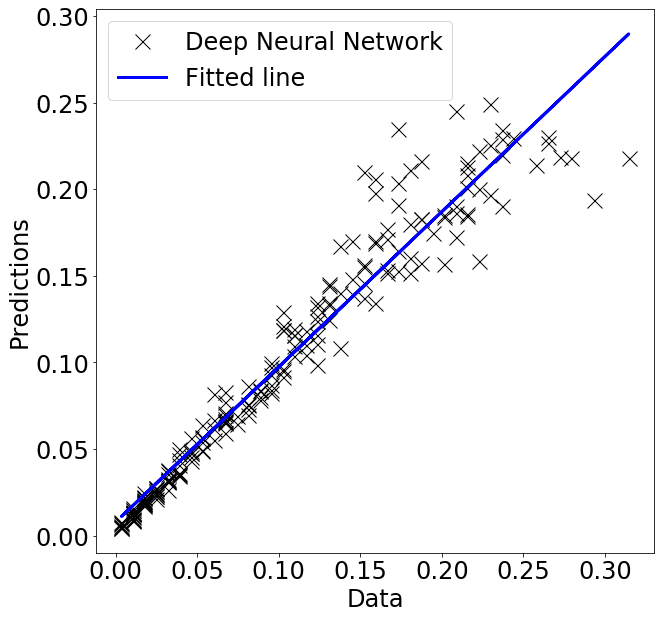

In [24]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [25]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.9410984343660569

In [26]:
reg.coef_[0]

array([0.89568111])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dat_2, lambdas_2.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

model = load_model('my_model.h5')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))

model.save('my_model.h5')

y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 5s 7ms/step - loss: 0.0065 - val_loss: 8.1595e-05
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 7.2678e-05 - val_loss: 6.7212e-05
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 5.4064e-05 - val_loss: 6.5814e-05
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 4.0618e-05 - val_loss: 6.8212e-05
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 3.5679e-05 - val_loss: 6.4700e-05
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 3.4412e-05 - val_loss: 7.0795e-05
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 2.8350e-05 - val_loss: 6.5922e-05
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 2.5386e-05 - val_loss: 6.7091e-05
Epoch 9/10
800/800 [==============================] - 5s 6ms/step - loss: 2.4541e-05 - val_los

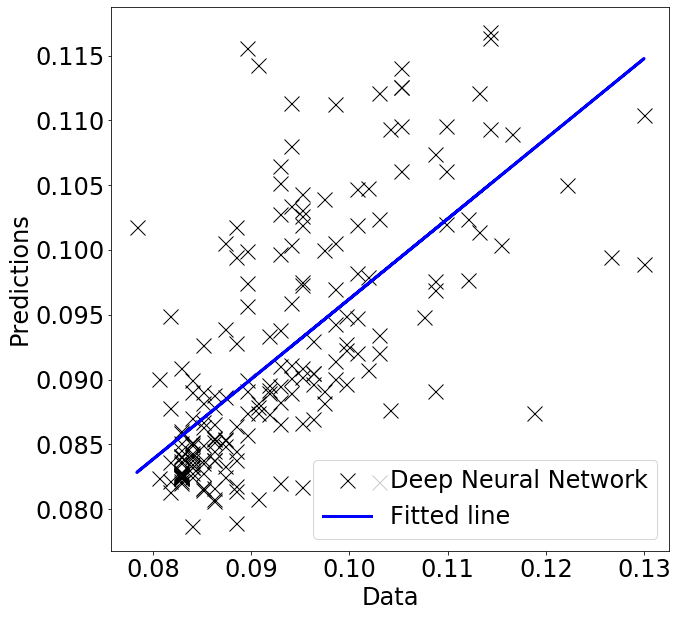

In [30]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [31]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.4525803045351471

In [32]:
reg.coef_[0]

array([0.61830989])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dat_3, lambdas_3.reshape(-1,1), test_size=0.2, random_state=42)
X_train = X_train.reshape(800,91,81,1)
X_test = X_test.reshape(200,91,81,1)

model = load_model('my_model.h5')
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data = (X_test, y_test))

model.save('my_model.h5')

y_pred = model.predict(X_test)

#Linear Reg
reg = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
y_pred_lin = reg.predict(y_test.reshape(-1,1))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 5s 7ms/step - loss: 4.5889e-06 - val_loss: 2.7373e-07
Epoch 2/10
800/800 [==============================] - 5s 7ms/step - loss: 2.9476e-07 - val_loss: 2.0001e-07
Epoch 3/10
800/800 [==============================] - 5s 7ms/step - loss: 2.2455e-07 - val_loss: 2.3121e-07
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 2.1255e-07 - val_loss: 1.8481e-07
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 1.9509e-07 - val_loss: 1.9222e-07
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 1.9097e-07 - val_loss: 1.7567e-07
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 1.7943e-07 - val_loss: 1.7113e-07
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 1.8622e-07 - val_loss: 1.6711e-07
Epoch 9/10
800/800 [==============================] - 5s 6ms/step - loss: 1.6973e-07 - val

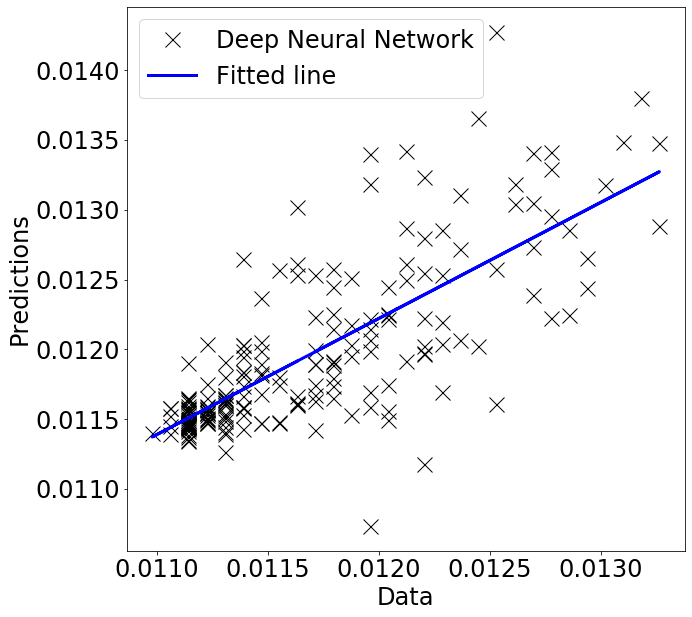

In [34]:
plt.figure(figsize=(10,10))
plt.plot(y_test, y_pred, 'kx', label='Deep Neural Network',markersize=15)
plt.plot(y_test, y_pred_lin, color='blue', label='Fitted line', linewidth=3)
#plt.xlim(0.08,0.15)
#plt.ylim(0.08,0.15)
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()

In [35]:
reg.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.5791418550092462

In [36]:
reg.coef_[0]

array([0.83147345])

## ASDEX Upgrade Data

In [52]:
mat_data_samples_au = loadmat('saveasdex_data.mat')
samples_au = mat_data_samples_au['asdex_data'].squeeze()

dat_au = []
for i in range(samples_au.shape[1]):
    temp = samples_au[:,i]
    temp = np.flip(temp.reshape(91,81))
    dat_au.append(temp)
dat_au = np.array(dat_au)

In [59]:
dat_au[0].size

7371

In [68]:
X_test = dat_au.reshape(150,91,81,1)
model = load_model('my_model.h5')

y_pred = model.predict(X_test)

In [70]:
import scipy.io as sio

In [72]:
sio.savemat('y_pred.mat', {'vect':y_pred})